# CUSTOMER INCOME DATASET ANALYSIS

## Modules

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sbs

import warnings
warnings.filterwarnings("ignore")

## Initializing the dataset

In [8]:
df = pd.read_csv("customer_income_data.csv")
df.head()

,CustomerID,CustomerGender,CustomerAge,CustomerCity,AnnualIncome,CreditScore,SpendingScore,CustomerCityID
0,1001,Male,49,Bengaluru,527547.58850,653,78,1
1,1002,Male,59,Bengaluru,207143.19760,630,63,1
2,1003,Female,54,Delhi,164423.84570,555,69,4
3,1004,Female,42,Bengaluru,56220.36443,699,30,1
4,1005,Female,30,Bengaluru,256194.36190,793,6,1


## Cleaning the dataframe

### Checking for null values

In [9]:
df.isnull().sum()
# df.dropna()

CustomerID        0
CustomerGender    0
CustomerAge       0
CustomerCity      0
AnnualIncome      0
CreditScore       0
SpendingScore     0
CustomerCityID    0
dtype: int64

### Looking at the Five Points Summary of the dataframe

In [11]:
df.describe()

,CustomerID,CustomerAge,AnnualIncome,CreditScore,SpendingScore,CustomerCityID
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000
mean,1100.500000,45.520000,285143.931646,719.975000,50.70500,2.850000
std,57.879185,16.113592,169229.187619,104.578236,28.72269,1.475938
min,1001.000000,18.000000,2577.057456,551.000000,2.00000,1.000000
25%,1050.750000,31.750000,153227.340950,628.250000,27.75000,1.750000
50%,1100.500000,46.500000,263418.505550,715.000000,48.00000,3.000000
75%,1150.250000,59.000000,384857.116200,806.250000,77.00000,4.000000
max,1200.000000,75.000000,695407.091700,897.000000,100.00000,5.000000


### Looking at the columns of the dataframe

In [14]:
df.columns

Index(['CustomerID', 'CustomerGender', 'CustomerAge', 'CustomerCity',
       'AnnualIncome', 'CreditScore', 'SpendingScore', 'CustomerCityID'],
      dtype='object')

## Data Visualization

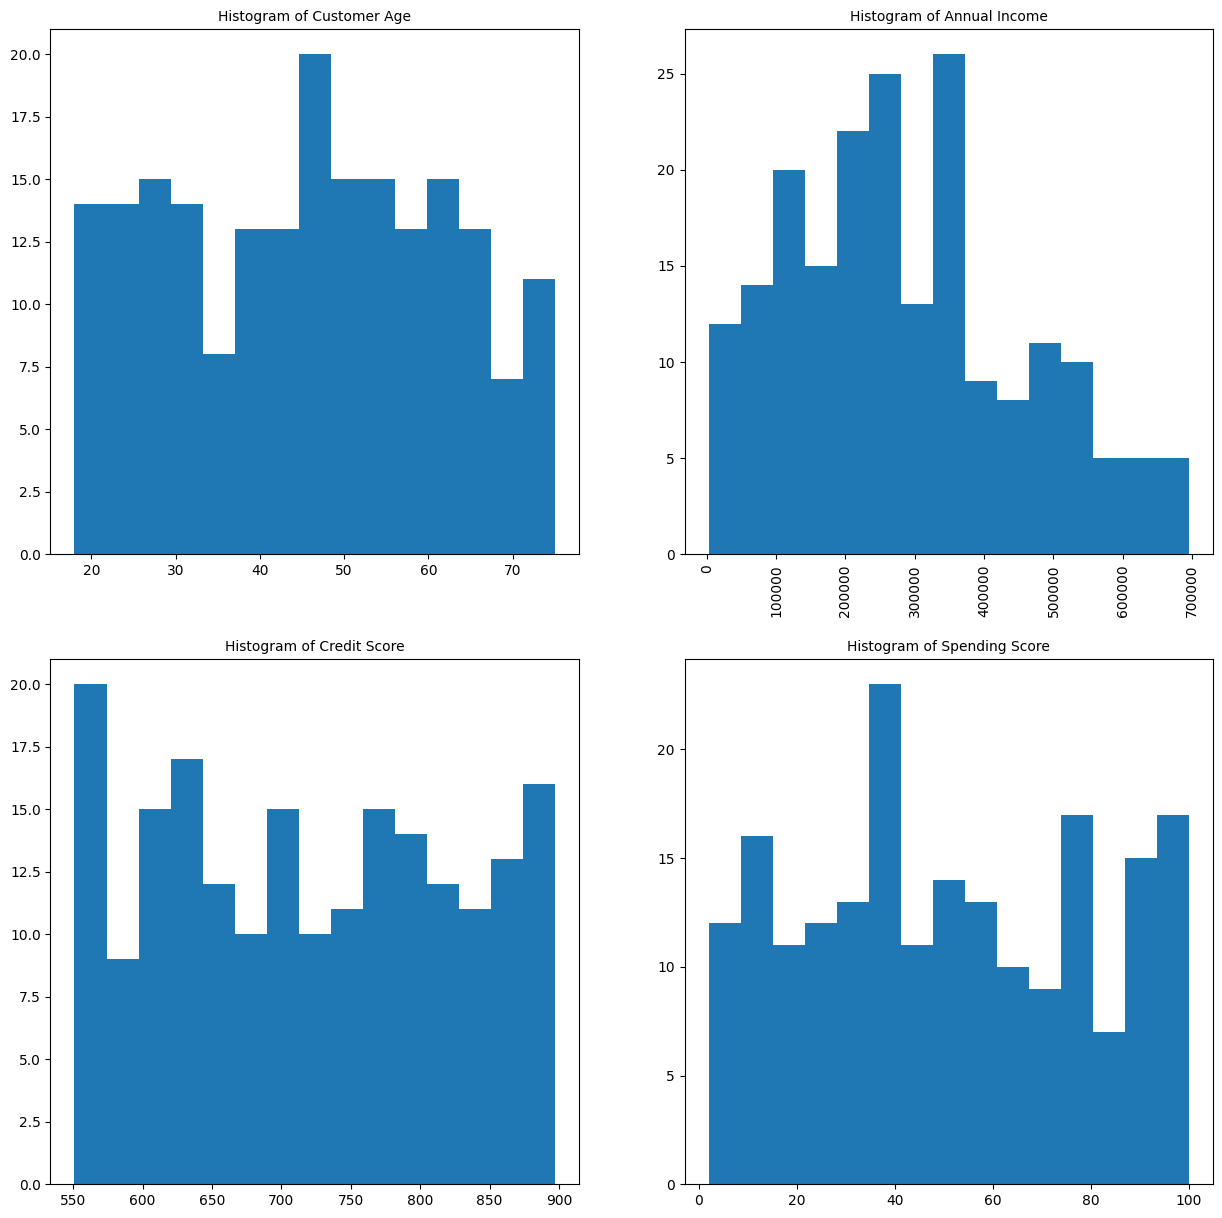

In [27]:
plt.figure(figsize=(15, 15))


plt.subplot(2, 2, 1)
plt.hist(df['CustomerAge'], bins=15)
plt.title('Histogram of Customer Age', fontdict={'size':10})

plt.subplot(2, 2, 2)
plt.hist(df['AnnualIncome'], bins=15)
plt.xticks(rotation='vertical')
plt.title('Histogram of Annual Income', fontdict={'size':10})

plt.subplot(2, 2, 3)
plt.hist(df['CreditScore'], bins=15)
plt.title('Histogram of Credit Score', fontdict={'size':10})

plt.subplot(2, 2, 4)
plt.hist(df['SpendingScore'], bins=15)
plt.title('Histogram of Spending Score', fontdict={'size':10})

plt.show()

## Data Analysis

### Measures of Central Tendency

In [31]:
# Annual Income

# mean
df['AnnualIncome'].mean()

# median
df['AnnualIncome'].median()

# mode
df['AnnualIncome'].mode()

0        2577.057456
1        5121.652342
2       10349.414070
3       12396.061280
4       15305.842870
           ...      
195    651534.309800
196    671028.187200
197    675461.735700
198    687212.770700
199    695407.091700
Name: AnnualIncome, Length: 200, dtype: float64

### Measures of Shape and Variability

In [35]:
# variance
df['SpendingScore'].var()

# standard deviation
df['SpendingScore'].std()

# skewness
sts.skew(df['SpendingScore'])

0.10081837365183154

### Detecting Outliers using z-score

In [41]:
z = np.abs(sts.zscore(df[['AnnualIncome', 'SpendingScore']]))
z

np.where(z > 2)

(array([ 62,  65, 114, 148, 155, 166, 171, 177, 194]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0]))

It shows that the index/row 62, 65, 114, ... have z-score greater than 2 in Annual Income column.  
Hence, these are our outiers.

In [42]:
z.iloc[62]

AnnualIncome     2.312233
SpendingScore    0.289521
Name: 62, dtype: float64

In [44]:
z.iloc[114]

AnnualIncome     2.381846
SpendingScore    1.720546
Name: 114, dtype: float64

### Detecting Outliers using Scatter plot

<AxesSubplot: xlabel='CustomerAge', ylabel='SpendingScore'>

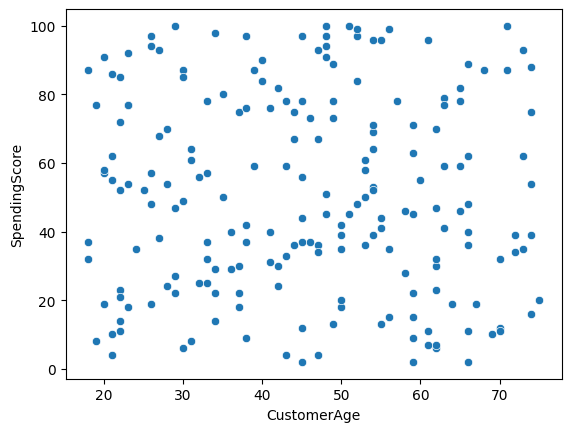

In [47]:
sbs.scatterplot(data=df, x='CustomerAge', y='SpendingScore')

From the scatterplot, we can clearly observe that the dataset is a random collection of data.   
Hence, we dont seem to find any outliers in this dataset.